### Constantin Gleyze - Ecole Polytechnique & Sorbonne University

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">1. Introduction</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

The goal of this project is to implement the Longstaff-Schwartz (2001) algorithm for bermudean option as well as to propose a lower and upper bound through the primal and dual problem. 

We therefore consider a bermudean option $(C_t)_{t \in [0,T]}$ on an underlying, which has under the risk neutral probability $\mathbb{Q}$ the following dynamic : 

$\forall t \in [0,T], \space dX_t = X_t((r - q)dt + \sigma dW_t)$

with $r$ the risk-free interest rate, $q$ the continuous dividend yield, $\sigma$ the volatility and $(W_t)_{t \in [0,T]}$ a geometric brownian motion under $\mathbb{Q}$. 

We pose as $(\mathcal{F}_{t})_{t \in [0,T]}$ the natural filtration of the process $X$. 

We discretise $T$ in $N$ steps $t_0$,....,$t_N$ corresponding to the exercise date of the option.  

For each $n$  in {$0$,....,$N$}, the holder can exercise the option with payoff $\varphi_n(X):=\varphi(t_n,X_{t_n})$. 

In the case of a put, $\varphi_n(X):=(K - X_{t_n})_+$

In other word, the expected payoff at each exercise time $t_n$  in {$t_0$,....,$t_N$} at time $t_k$ such that $t_k\leq t_n$ is : 

- $\mathbb{E}^{\mathbb{Q}} \left[ D_{t_k, t_n} \varphi_n(X) \mid \mathcal{F}_{t_k} \right]$ with $ D_{t_k, t_n} := e^{-r(t_n-t_k)}$ the actualisation factor.

The price of the option can be expressed as : 

$C_0 = sup_{\tau \in \mathcal{T}_0^N}\mathbb{E}^{\mathbb{Q}}[D_{t_0, \tau} \varphi_{\tau}]$ with $\tau \in \mathcal{T}_0^N$ the set of $\mathcal{F}$ stopping times with $\mathbb{Q}$  always surely values in {$t_0$,....,$t_N$}. 


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">2. Longstaff-Schwartz algorithm</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

We remember the **Longstaff-Schwartz algorithm**, a backward algorithm, using the same notation as previous : 

**Step 1:** Simulate $n_1$ of the underlying between 0 and $T = t_n$ following the chosen discretisation.

**Step 2:** Fix $\hat{\tau}_N = t_N$

**Step 3:** For $i = N-1, \dots, 1$,

   Compute the continuation value $\hat{C}_{t_i} = \mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid \mathcal{F}_{t_i} \right]$

   $\hat{\tau}_i =
    \begin{cases}
        t_i & \text{if } \hat{C}_{t_i} \leq \varphi_{t_i} \\
        \hat{\tau}_{i+1} & \text{otherwise}
    \end{cases}$
    
**Step 4:** Estimate the optimal strategy $\hat{\tau} = \hat{\tau}_1$ and the estimated price $\hat{C}_0$ of the option is :
   
   $\hat{C}_0 = \mathbb{E}^{\mathbb{Q}} \left[ D_{t_0, \hat{\tau}} \varphi_{\hat{\tau}} \right]$

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">3. Longstaff-Schwartz in practice</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

We denote $\varphi_n^{(j)}:=\varphi(t_n,X_{t_n}^{(j)})$ and $\varphi_{\tau_{n}^{(j)}}^{(j)}:=\varphi(\tau_{n}^{(j)},X_{\tau_{n}^{(j)}}^{(j)})$

**Step 3:** For $i = N-1, \dots, 1$, the continuation value $\hat{C}_{t_i} = \mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid \mathcal{F}_{t_i} \right] = \mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid {X}_{t_i}=x \right]$ is estimated by resolving :
    
$\theta^* = \arg\min_{\theta \in \mathbb{R} } \mathbb{E}^{\mathbb{Q}} \left[ (D_{t_i, \hat{\tau}_{i+1}}\varphi_{\hat{\tau}_{i+1}} - f({X}_{t_i}; \theta))^2 \right]\Big|_{{X}_{t_i} = x}
$  and   $\space \mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid {X}_{t_i} = x \right] \approx f({X}_{t_i}; \theta^*)$}

In particular, we may choose $ f(X; \theta) = \sum_{k=0}^{n} \theta_k f_k(X)$ to be the linear sum of basis functions $\{f_k \}_{k=0}^{m}$. 

i.e $D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \approx \sum_{k=0}^{m} \theta_k f_k(X) + \epsilon$ where $\epsilon$ is an independant noise  and $\mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid {X}_{t_i} = x \right] \approx \sum_{k=0}^{m} \theta_k f_k({X}_{t_i})$
 
We will use polynomial function to approximate this continuation value i.e the optimal function with polynomial degree m would be :
$\phi(x,\theta^*) = \sum_{k=0}^{m} \theta_k^* f_k(x) = \begin{pmatrix} \theta_0^*, \cdots, \theta_m^* \end{pmatrix} \begin{pmatrix} 1 \\ x \\ \vdots \\ x^m \end{pmatrix}.$

Hence, for each generated path $j=1,..,n_1$ and for $i = 1, \dots, N-1$:  $\space\hat{C}_{t_i}^{(j)} = \sum_{k=0}^{m} \theta_k^{*,i} f_k(X_{t_i}^{(j)})$

with terminal value $\hat{C}_{t_N}^{(j)} = e^{-rt_N}\varphi_N^{(j)}$ for j within {$1$,..,$n_1$}

**Step 4:** $\hat{\tau} = \inf_{i=1,\dots,N} \left\{ t_i \mid \hat{C}_{t_i} \leq \varphi_{t_i} \right\}$
  
i.e for each generated path j within {$1$,..,$n_1$}: 

$\hat{\tau}^{(j)} = \inf_{i=1,\dots,N} \left\{ t_i \mid \hat{C}_{t_i}^{(j)} \leq \varphi_{t_i}^{(j)} \right\}$

and $\hat{C}_0 = \mathbb{E}^{\mathbb{Q}} \left[ D_{0, \hat{\tau}} \varphi_{\hat{\tau}} \right]$ = $\frac{1}{n_1} \sum_{j=1}^{n_1} D_{0, \hat{\tau}^{(j)}} \varphi_{\hat{\tau}^{(j)}}^{(j)}$


   

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">4. Improvments of the Longstaff-Schwartz algorithm - Lower bound Price</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

One of the main problem with this backward approach is the approximate error due to the approximation of the continuation value $\hat{C}_{t_i}^{(j)}$. 

Moroever, the construction of the stopping time make them not adapted to $(\mathcal{F}_{t})_{t \in [0,T]}$ as they can "look" in the future by construction. 

Therefore, to obtain a low-biaised price, we can do the following algorithm : 

**Step 1:** Run a Longstaff-Schwartz algorithm with $n_1$ paths and obtain an estimation of the optimal strategy i.e ${\begin{pmatrix} \theta_0^{*,i}  \\ \vdots \\ \theta_m^{*,i} \end{pmatrix}}_{i = 1,..,N-1}$

**Step 2:** Simulate $n_2$ new independant paths such that for each path j in {$1$,..,$n_2$} they are stopped according :

   $\hat{\tau}^{(j)} = \inf_{i=1,\dots,N} \left\{ t_i \mid \hat{C}_{t_i}^{(j)} \leq \varphi_{t_i}^{(j)} \right\}$ 
   
   and compute the average payoff $\hat{C}_0 = \mathbb{E}^{\mathbb{Q}} \left[ D_{0, \hat{\tau}} \varphi_{\hat{\tau}} \right]$ = $\frac{1}{n_2} \sum_{j=1}^{n_2} D_{0, \hat{\tau}^{(j)}} \varphi_{\hat{\tau}^{(j)}}^{(j)}$


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">5. The Broadie-Andersen algorithm - Upper bound price</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

We consider the same bermudean option as above with the same notation. 

**Step 1:** Run first a primal Longstaff-Schwartz algorithm with $n_1$ paths to obtain the matrix of nearly optimal stopping times $(\tau_{i,j})_{ij}$ for $i$ = $1$,..,$N$ and $j$ = $1$,..,$n_1$.

   We pose $V_{t_i}^{(j)} =\mathbb{E}^{\mathbb{Q}} \left[ D_{0, {\tau}_{i}^{(j)}} \varphi_{{\tau}_{i}^{(j)}}^{(j)} \mid \mathcal{F}_{t_i} \right]$ we will be using as an approximation of the Snell envelope of $D_{0,t}\varphi_t$.

**Step 2:** Simulate $n_2$ new independent paths. For each of these paths at time $t_i$, we need to estimate $V_{t_i}^{(j)}$ and $\space \mathbb{E}^{\mathbb{Q}} \left[ V_{t_{i+1}}^{(j)} \mid \mathcal{F}_{t_i} \right]$.

   **If $\tau_i^{(j)} > t_i$**:

   We simulate $n_c$ new independent subpaths starting from $(t_i,X_{t_i})$ and we do another lower bound LS algorithm. 
   
   More precisely, for $m$ in {$1$, ... , $n_c$}, we define $\tau^{m} = \inf_{t_{i+1} \leq {t_j} \leq {t_N}} (\hat{C}_{t_j}^{(m)} \leq \varphi_{t_j}^{(m)})$

   and $V_{t_i}^{(j)} = \mathbb{E}^{\mathbb{Q}} \left[ V_{t_{i+1}}^{(j)} \mid \mathcal{F}_{t_i} \right] \approx \frac{1}{n_c} \sum_{m=1}^{n_c} D_{0,\tau^{m}} \varphi_{\tau^{m}}^{(m)}$

   **If $\tau_i^{(j)} = t_i$**:

   $V_{t_i}^{(j)} = D_{t_i}^{(j)}\varphi_{t_i}^{(j)}$ and $V_{t_i}^{(j)} = \mathbb{E}^{\mathbb{Q}} \left[ V_{t_{i+1}}^{(j)} \mid \mathcal{F}_{t_i} \right] \approx \frac{1}{n_e} \sum_{m=1}^{n_e} D_{0,\tau^{m}} \varphi_{\tau^{m}}^{(m)}$ for $m$ in {$1$, ... , $n_e$}. 

**Step 3:** We then build the martingale $(M_n)_{n = 0,..,N}$ such that :

   $M_0 = 0$ and $M_{t_{i+1}}^{(j)} = M_{t_i}^{(j)} + V_{t_{i+1}}^{(j)} - \mathbb{E}^{\mathbb{Q}}\left[ V_{t_{i+1}}^{(j)} \mid \mathcal{F}_{t_i} \right]$

   and then compute the upper bound price $\mathbb{E}^{\mathbb{Q}} \left[ \max_{1 \leq i \leq N} \left( D_{0,t_i} \varphi_{t_i} - M_{t_i} \right) \right] = \sum_{j=1}^{n_2} (\max_{1 \leq i \leq N}  (D_{0,t_i}^{(j)} \varphi_{t_i}^{(j)} - M_{t_i}^{(j)}))$

   The complexity of this algorithm is at most $n_1 + n_2*(N-1)*max(n_c,n_e)$. 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
plt.rc('figure', figsize=(6, 5.5))
plt.rc('axes', grid=True, xmargin=0, ymargin=0, autolimit_mode='round_numbers')
import time
import pandas as pd
from IPython.display import display, HTML
import warnings
warnings.simplefilter('ignore', np.RankWarning)  # Ignore les RankWarnings

In [2]:
def paths_simulation(ts, n_paths : int, S0 : float, vol : float, r: float=0, q: float=0, rng: np.random.Generator = None):

    """Generate trajectories in Black-Scholes model.

    Parameters
    ----------
    ts: array_like
        The time steps of the simulation. 
    S: scalar
        The spot price of the underlying.
    vol: scalar
        The implied Black-Scholes volatility.
    r: scalar
        The annualized risk-free interest rate, continuously compounded (default: 0).
    q: scalar
        The annualized continuous dividend yield (default: 0).
    rng: random generator
         The specific generator if we want to replicate the results (default: None). 

    Returns
    -------
    paths: ndarray
        The paths.
    """
    
    #If no generator is given, we initialize one
    if rng is None : 
        rng = np.random.default_rng() 

    #We construct our matrix for the prices and initialize it 
    paths = np.full((len(ts), n_paths), np.nan, dtype=np.float64)
    paths[0] = S0

    #We genrate our paths
    for i in range(1,len(ts)):
        dt = ts[i] - ts[i-1]
        dW = np.sqrt(dt)*rng.standard_normal(n_paths)
        paths[i,:] = paths[i-1,:] * np.exp((r-q-(1/2)*vol**2)*dt + vol*dW)
    return paths

In [3]:
 def plot_continuation (ts, S, coeffs, payoff_function,K): 

    """
    Plots the continuation value and payoff function at different time steps.
    
    Parameters:
    -----------
    ts : np.array
        Array of discrete time points in the simulation.
    S : ndarray
        Matrix of simulated underlying asset prices (shape: (len(ts), n_paths)).
    coeffs : ndarray
        Polynomial coefficients used to approximate the continuation value (shape: (len(ts), n_paths)).
    payoff_function : function
        Function that computes the payoff given the asset price and strike price.
    K : float
        Strike price of the option.
    """

    # We determine how many plots we will do according to the discretization and we fix our range for the abscisse values
    num_plots = len(ts) - 2
    cols = min(5, num_plots)  # Maximum 5 plots per row
    rows = (num_plots + cols - 1) // cols  # Compute necessary rows
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = np.array(axes).flatten()
    x_vals = np.linspace(S.min(),S.max()/(2*ts[-1]), 100)

    # We plot the continuation function and payoff_function value applied to xvalues
    for i in range(1, num_plots + 1):
        continuation_plot = np.polyval(coeffs[:, i], x_vals)
        axes[i-1].plot(x_vals, continuation_plot, label='Continuation', color='blue')
        axes[i-1].plot(x_vals, payoff_function(x_vals, K), label='Value', color='red')
        axes[i-1].set_title(f"$t_n$ = {ts[i]:.1f}")
        axes[i-1].set_xlabel("S value")
        axes[i-1].set_ylabel("PnL")
        axes[i-1].set_xlim(S.min()*0.8, (S.max()/(2*ts[-1])) * 1.05)
        axes[i-1].legend()
        axes[i-1].grid(False)
        
    # We define the same limits for values in all plots 
    ymin = min(ax.get_ylim()[0] for ax in axes if ax.has_data())
    ymax = max(ax.get_ylim()[1] for ax in axes if ax.has_data())

    for ax in axes:
        ax.set_ylim(ymin, ymax)  

    # We remove unused plot
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

def plot_optimal_trajectories(S, to, ts, n_samples=10):
    
    """
    Plots randomly chosen stopped trajectories according to the optimal exercise strategy.
    
    Parameters:
    -----------
    S : ndarray
        Matrix of simulated underlying asset prices (shape: (len(ts),.)).
    to : ndarray
        Matrix of optimal exercise times for each trajectory (shape: (len(ts),.)).
    ts : np.array
        List of discrete time points in the simulation.
    n_samples : int, optional
        Number of trajectories to display (default: 10).
    """
    
    # We randomly choose n_samples paths to display
    plt.figure(figsize=(10, 6))
    n_paths = S.shape[1]
    sample_indices = np.random.choice(n_paths, size=min(n_samples, n_paths), replace=False)

    # We identify their corresponding stopping time and then plot the stopped trajectory
    for idx in sample_indices:
        stopping_time = to[0, idx]
        stopping_index = np.searchsorted(ts, stopping_time)
        plt.plot(ts[:stopping_index + 1], S[:stopping_index + 1, idx])
    
    plt.xlabel("t")
    plt.ylabel(r'$S_t$')
    plt.title("Paths given the optimal exercise strategy - Longstaff Schwartz algorithm")
    plt.grid(True)
    plt.show()

In [4]:
class LS_algo :

    """Class to compute american option lower and higher bound price using Logstaff-Schwartz and Boreadie-Anderson algorithm
     
    Initial parameters of the class
    ----------
    S0: scalar or array_like
        The current price of the underlying asset.
    vol: scalar or array_like
         The volatility of the underlying. 
    r:  scalar or array_like
        The annualized risk-free interest rate, continuously compounded. 
    q:  scalar or array_like
        The annualized continuous dividend yield.

    Methods : 

    All algorithms estimates the continuation value through polynomial function 
    
    1. price_LS : Return the estimated coefficients to compute the continuation values. 
    2. lower_bound_price : Function to simulate new paths and take the averaged actualized payoff according to the optimal strategies (continuation coefficients). 
    3. upper_bound_price : Higher bound pricing using the Broadie-Andersen algorithm 
    
    """

    # Initialisation of the class parameter
    def __init__(self, S0: float=100, vol: float=0.25, r: float =0., q: float =0.):        
        self.S0 = S0
        self.vol = vol
        self.r = r
        self.q = q
    
    def continuation_coefficients(self, n_paths1, ts, payoff_function,K, polynomial_deg = 3, continuation_plot = False,optimal_trajectories_plot=False,n_samples = 50):

        """
        Computes the estimated coefficients to compute the continuation values.
    
        Parameters:
        -----------
        n_paths1 : int
            Number of Monte Carlo simulations to compute the optimal strategy.
        ts : np.array
            Array of discrete time points in the simulation.
        payoff_function : function (S : scalar or array like, K : scalar or array like)
                          Payoff function for the derivatives.
                          S : Price of the underlying
                          K : Strike 
                          Return : scalar or array like
        K : float
            Strike price of the option.
        polynomial_deg : int 
                         The degree of the polynomial function to estimate the continuation value (default: 3). 
        continuation_plot : bool, optional
            If True, plots the continuation values function(default: False).
        optimal_trajectories_plot : bool, optional
            If True, plots the optimal exercise trajectories (default: False).
    
        Returns:
        --------
        ndarray:
            Returns the estimated coefficients to compute the continuation values of the option. 
        """

        S1 = paths_simulation(ts, n_paths1, self.S0, self.vol, self.r, self.q)

        if len(ts) == 1 : 
            return "You should use the formula for the pricing of European options"
    
        if len(ts) ==2 : 
            return np.mean(payoff_function(S1[-1,:],K)*np.exp(-self.r*(ts[-1]-ts[0])))

        # Simulate first set of paths and initiliaze the memory
        V1 = payoff_function(S1[-1, :], K)
        thetas = np.zeros((polynomial_deg+1, len(ts)),dtype=np.float64)  
        to1 = np.full((len(ts), n_paths1), np.nan, dtype=np.float64)

        # By default, we stop at maturity
        to1[-1,:] = ts[-1]
        
        for i in range(len(ts) - 2, -1, -1): 
            V1 = V1*np.exp(-self.r*(ts[i+1]-ts[i])) # Discount the continuation value
            theta = np.polyfit(S1[i, :], V1, deg=polynomial_deg) # Determine the coefficients to compute the continuation value
            continuation_value = np.polyval(theta, S1[i, :]) # We compute the continuation value
            thetas[:, i] = theta  # We stock the coefficients 
            exercice_value = payoff_function(S1[i,:],K) # We compute the value if we exercise now 
            to1[i, :] = np.where(continuation_value <= exercice_value, ts[i], to1[i+1,:]) # We store where we should exercise or not  
            idx = np.searchsorted(ts, to1[i, :]) # We find the corresponding value of to in ts 
            V1 = payoff_function(S1[idx, np.arange(n_paths1)], K) * np.exp(-self.r*(to1[i, :] - ts[i])) # We update V 
            
        # If asked, we plot the continuation value function obtained 
        if continuation_plot:
            plot_continuation (ts, S1, thetas,payoff_function,K)

        # If asked, we plot a subset of the trajectories stopped optimally
        if optimal_trajectories_plot: 
            plot_optimal_trajectories(S1, to1, ts, n_samples)
            
        return thetas

    def lower_bound_price(self,S,n_paths, ts,payoff_function,K,coefficients = None, n_paths1 = 100000):

        """
        Computes lower bound price given coefficients.
        
        Parameters:
        -----------
        S : int 
            The beginning price of the undelrying. 
        n_paths2 : int
            Number of Monte Carlo simulations to compute the lower bound price using the optimal strategy.
        ts : np.array
            Array of discrete time points in the simulation.
        payoff_function : function (S : scalar or array like, K : scalar or array like)
                          Payoff function for the derivatives.
                          S : Price of the underlying
                          K : Strike 
                          Return : scalar or array like
        K : float
            Strike price of the option.
        coefficients : ndarray 
                       The coefficients to compute the continuation value (default: None). 
        n_paths1 : int 
                   The number of paths to compute the coefficients in the case they are not given (default: 100000)
        
        Returns:
        --------
        float:
            Returns the lower bound price of the option.
        """
            
        # If no coefficients for the continuation value are given, we compute it with a three degree polynomial approach by default
        if coefficients is None : 
            thetas = self.continuation_coefficients(n_paths1, ts, payoff_function,K, polynomial_deg=3, continuation_plot = False,optimal_trajectories_plot=False)
        else : 
            thetas = coefficients
            
        price = 0        
        S2 = np.full(n_paths, S, dtype = np.float64) # Get the initial given price
        for i in range(1, len(ts)): 

            # We construct our prices step by step in case all paths are exercised before maturity
            dt = ts[i] - ts[i-1]
            dW = np.random.randn(len(S2))*np.sqrt(dt)   
            S2 = S2*np.exp((self.r-self.q)*dt)*np.exp(-0.5*self.vol**2*dt + self.vol*dW)
            
            # We estimate the continuation value
            continuation_value = np.polyval(thetas[:,i], S2)
            exercise_value = payoff_function(S2,K)

            # If we should exercise, we exercise and we get rid of the concerned paths
            if i < len(ts)-1: 
                strategy = continuation_value <= exercise_value # Determine wich path should be exercised
                price += np.sum(exercise_value[strategy])*np.exp(-self.r*ts[i])
                S2 = S2[~strategy] # Remove exercised paths
                if len(S2) ==0 : 
                    break 
                    
            # If we arrive at maturity, we exercise all paths
            else: 
                price += np.sum(exercise_value)*np.exp(-self.r*ts[i])
        return price/n_paths
                                              
    def upper_bound_Broadie_Anderson (self,n_paths2, n_paths3, nc_paths,ne_paths, ts, payoff_function,K,coefficients = None,n_paths1 = 100000):
        
        """
        Computes the upper bound price of an American option using the Broadie-Andersen duality approach.

        Parameters:
        -----------
        n_paths2 : int
                   Number of Monte Carlo simulations for the lower bound estimation.
        n_paths3 : int
                   Number of Monte Carlo simulations for the upper bound estimation.
        nc_paths : int
                   Number of nested control variate paths per primary path in the upper bound calculation.
        ne_paths : int
                   Number of nested exercise paths per primary path in the upper bound calculation.
        ts : np.array
             Array of discrete time points in the simulation.
        payoff_function : function (S : scalar or array like, K : scalar or array like)
                          Payoff function for the derivatives.
                          S : Price of the underlying
                          K : Strike 
                          Return : scalar or array like
        K : float
            Strike price of the option.
        coefficients : ndarray, optional
            Precomputed polynomial coefficients for continuation values. If None, they are computed in this function.
        n_paths1 : int, optional
            Number of paths to compute the coefficients if they are not given (default: 100000).

        Returns:
        --------
        tuple(float, float):
            - Lower bound estimate of the American option price.
            - Upper bound estimate of the American option price.
        """
        # If no coefficients are give, we compute it
        if coefficients is None : 
            thetas = self.continuation_coefficients(n_paths1, ts, payoff_function,K, polynomial_deg=3, continuation_plot = False,optimal_trajectories_plot=False)
        else : 
            thetas = coefficients

        # We compute our lower bound price as well as our new set of prices
        lower_bound = self.lower_bound_price(self.S0,n_paths2,ts,payoff_function,K,coefficients =thetas)
        S3 = paths_simulation(ts, n_paths3, self.S0, self.vol, self.r, self.q)
        to3 = np.full((len(ts), n_paths3), np.nan, dtype=np.float64)
        to3[-1,:] = ts[-1]
        
        # We initialize the memory and initialize the first row of our matrix V eand EV 
        V = np.full((len(ts), n_paths3), np.nan, dtype = np.float64)
        EV = np.full((len(ts), n_paths3), np.nan, dtype = np.float64)
        V[0,:] = lower_bound
        EV[0,:] = lower_bound

        for i in range (1, len(ts)-1):

            # We estimation our continuation and where to exercise
            continuation_value = np.polyval(thetas[:,i], S3[i, :])
            exercise_value = payoff_function(S3[i,:],K)
            strategy = continuation_value <= exercise_value

            for j in range(n_paths3): 
                if strategy[j]: 
                    V[i,j] = np.exp(-self.r*ts[i])*payoff_function(S3[i,j],K) # if exercised, V[i,j] = exercise value
                    EV[i,j] = self.lower_bound_price(S3[i,j],ne_paths,ts[i:],payoff_function,K,coefficients =thetas[:, i:]) # launch simulation to estimate E[V_{i+1}|F_i]
                else: 
                    V[i,j]  = self.lower_bound_price(S3[i,j],nc_paths,ts[i:],payoff_function,K,coefficients =thetas[:, i:]) # if continue, use nested simulation to estimate V[i, j]
                    EV[i,j] = V[i,j]
            
        V[-1,:] = np.exp(-self.r*ts[-1])*payoff_function(S3[-1,:],K) # We always exercise at maturity
        M = np.zeros(S3.shape, dtype=np.float64)
        M[1:] = np.cumsum(V[1:]-EV[:-1], axis=0)   
     
        payoff_matrix = np.exp(-self.r * ts[1:, None]) * payoff_function(S3[1:,:], K) - M[1:,:] # We define the matrix of the discounted payoff minus M 
        return lower_bound, np.mean(np.max(payoff_matrix, axis=0)) # We return the average of the maximum on each column

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Continuation functions plot and low biaised price</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

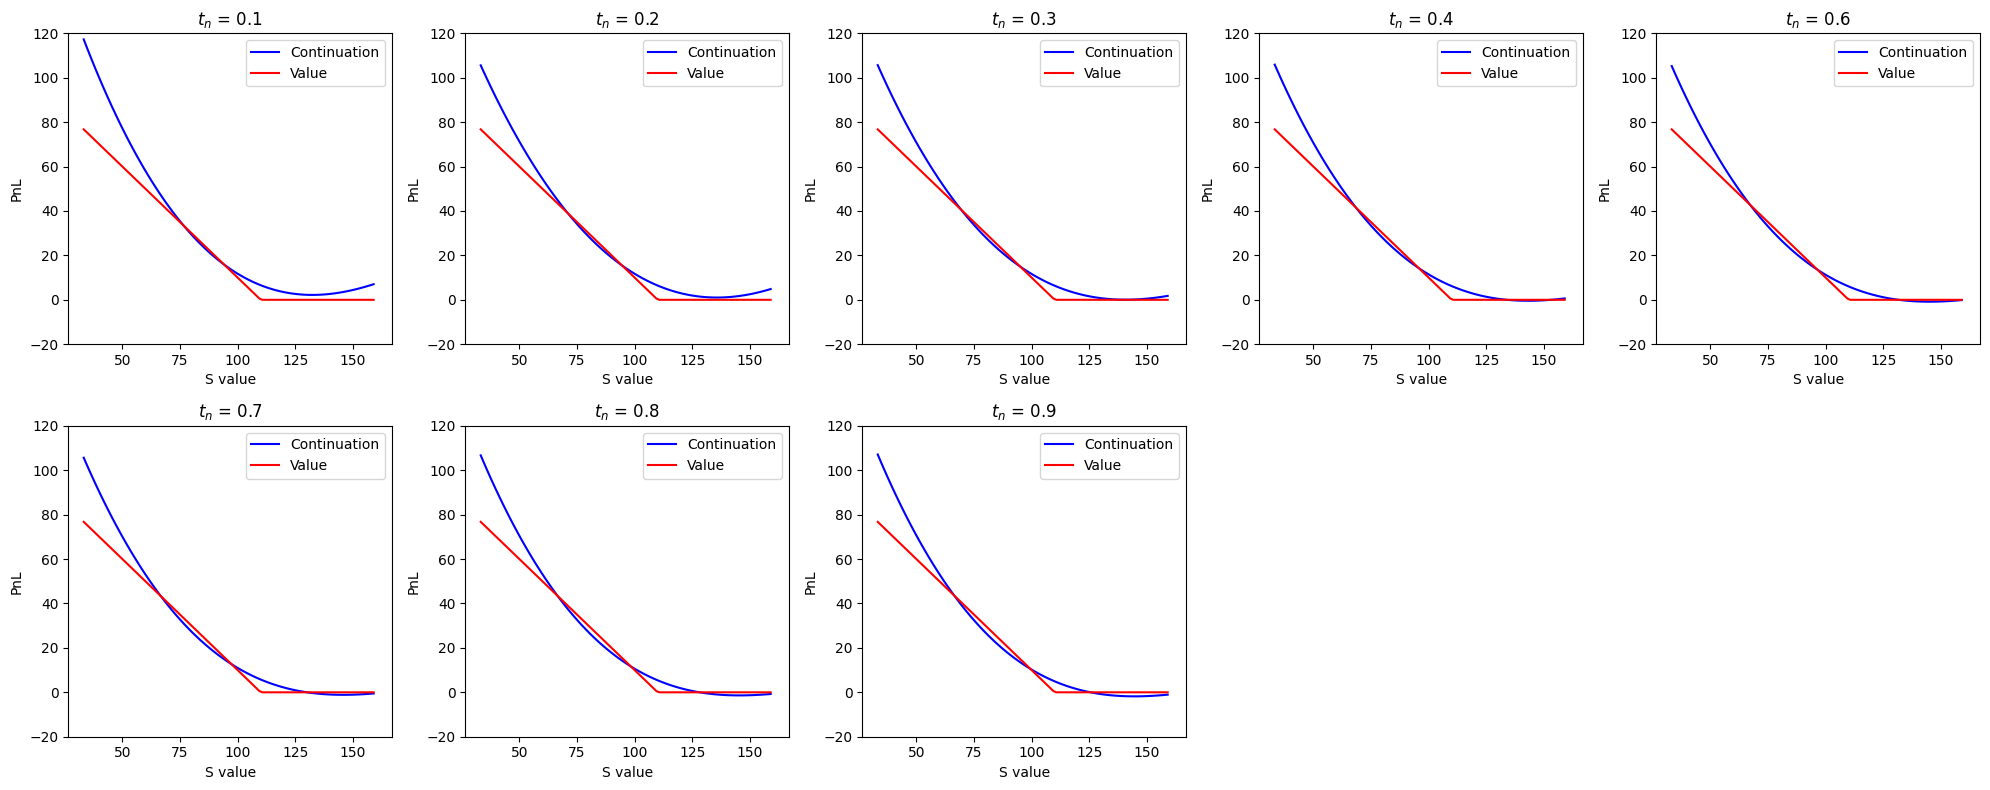

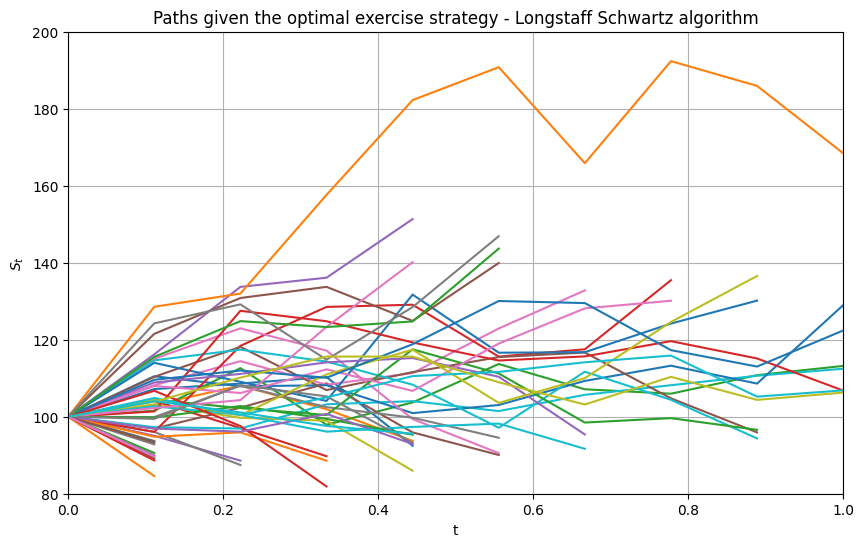


A low biaised price is : 11.9009



In [18]:
S0=100
K=110
T=1
ts = np.linspace(0,T,10)
vol=0.25
r=0.1
q=0.
n_paths_1 = 100000
n_paths_2 = 1000000
n_paths_3 = 5000

nc_paths = 2000
ne_paths = 2000
n_samples=15
n_add_plot=10

def payoff_put (S,K): 
    return np.maximum((K - S),0)

LS = LS_algo(S0,vol,r,q)
thetas = LS.continuation_coefficients(n_paths_1, ts, payoff_put,K, polynomial_deg = 3,continuation_plot = True,optimal_trajectories_plot=True,n_samples = 50)
lower_bound_price = LS.lower_bound_price(S0,n_paths_2, ts,payoff_put,K,coefficients = thetas)
print(f"\nA low biaised price is : {lower_bound_price:.4f}\n")

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Lower and higher bound price</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [20]:
n_paths_2 = 1000000
n_paths_3 = 5000
nc_paths = 2000
ne_paths = 2000

lower_bound, higher_bound = LS.upper_bound_Broadie_Anderson (n_paths_2,n_paths_3, nc_paths,ne_paths, ts, payoff_put,K,coefficients=thetas)

print(f"The price of this option is within the interval [{lower_bound:.4f},{higher_bound:.4f}]")

 The price of this option is within the interval [11.8611,11.9619]


To obtain a more precise interval, you should increase n_paths_3, nc_paths and ne_paths. However, it can be a little long for a low improvment.

We have to find the best polynomial degree that will reduce our approximation errors for the continuation values. 

In [56]:
n_paths_2 = 1000000
n_paths_3 = 5000
nc_paths = 2000
ne_paths = 2000

LS_lower_bound = []
LS_higher_bound = []
LS_lenght_interval = []
for deg in range (1,21,1): 
    
        thetas = LS.continuation_coefficients(n_paths_1, ts, payoff_put,K, polynomial_deg = deg,continuation_plot = False,optimal_trajectories_plot=False,n_samples = 50)
        lower_bound, higher_bound = LS.upper_bound_Broadie_Anderson (n_paths_2,n_paths_3, nc_paths,ne_paths, ts, payoff_put,K,coefficients=thetas)
        LS_lower_bound.append(lower_bound)
        LS_higher_bound.append(higher_bound)
        LS_lenght_interval.append(higher_bound-lower_bound)

df_results = pd.DataFrame({
    "Polynomial degree": [i for i in range (1,21,1)],
    "Lower bound price": np.round(LS_lower_bound, 5),
    "Higher bound price": np.round(LS_higher_bound, 5),
    "Difference" : np.round(LS_lenght_interval, 5)
})

In [57]:
def display_function(df_results): 
    min_diff_index = df_results["Difference"].idxmin()
    
    html_rows = []
    for i, row in df_results.iterrows():
        row_html = "".join([f"<td style='text-align: center; padding: 8px;'>{val}</td>" for val in row])
        if i == min_diff_index:  # Si c'est la ligne avec le min de "Difference"
            html_rows.append(f"<tr style='font-weight: bold;'>{row_html}</tr>")
        else:
            html_rows.append(f"<tr>{row_html}</tr>")
    
    html_table = f"""
    <table style="border-collapse: collapse;">
        <thead>
            <tr>
                {''.join([f"<th style='text-align: center; padding: 8px;'>{col}</th>" for col in df_results.columns])}
            </tr>
        </thead>
        <tbody>
            {''.join(html_rows)}
        </tbody>
    </table>
    """
    
    html_template = f"""
        <div style="margin-left: 0;">
            <div style="font-size: 20px; font-weight: bold; margin-bottom: 10px;">
                LS lower and higher bound according to polynomial degree
            </div>
            <div style="text-align: left;">  <!-- Garde le tableau aligné à gauche -->
                {html_table}
            </div>
        </div>
    """
    
    display(HTML(html_template))

In [58]:
display_function(df_results)

Polynomial degree,Lower bound price,Higher bound price,Difference
1.0,11.59786,12.03094,0.43308
2.0,11.75925,11.98881,0.22956
3.0,11.88688,11.98405,0.09717
4.0,11.89714,11.99381,0.09666
5.0,11.91775,11.97146,0.05372
6.0,11.93533,11.96914,0.03381
7.0,11.93783,11.9729,0.03507
8.0,11.95387,11.97437,0.0205
9.0,11.93841,11.95623,0.01782
10.0,11.9527,11.97228,0.01958
